In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
import csv
import os 
from random import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from keras_tuner.tuners import Hyperband
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from keras_tuner.tuners import Hyperband

In [2]:
# Create a testing and a validation file for each of the classes and move 80% of the data to it. 

# use splitfolder to do this. 
    
# splitfolders.ratio('Data', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [3]:
# splitfolders.ratio('img_data', output="output", seed=115, ratio=(.8, 0.1,0.1))

### Generating the train and validation set

In [4]:
train = ImageDataGenerator(horizontal_flip = True, rotation_range = 5)
val = ImageDataGenerator(horizontal_flip = True, rotation_range = 5)

In [5]:
x = 'train'
poses = os.listdir(f'output/{x}/')

print(max([len(os.listdir(f'output/{x}/{pose}')) for pose in poses]))
print(min([len(os.listdir(f'output/{x}/{pose}')) for pose in poses]))

72
14


In [6]:
train_set = train.flow_from_directory('output/train/',
                                         target_size = (250,250),
                                         class_mode = 'categorical', seed = 2)

val_set = val.flow_from_directory('output/val/',
                                       target_size = (250,250),
                                       class_mode = 'categorical', seed = 2)

Found 4752 images belonging to 107 classes.
Found 548 images belonging to 107 classes.


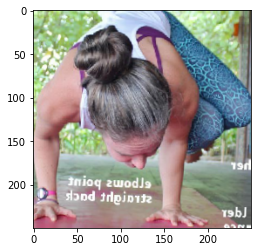

In [7]:
x_batch, y_batch = next(train_set)
plt.imshow(x_batch[0].astype(np.uint8))
 
# what is y_batch???

### Visualizing the data

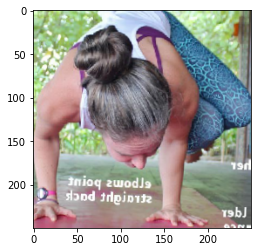

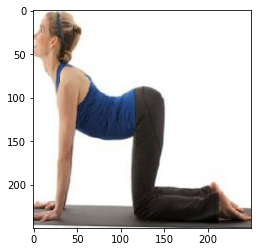

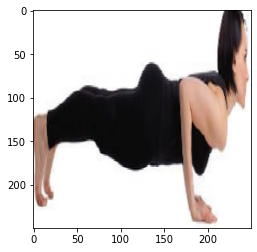

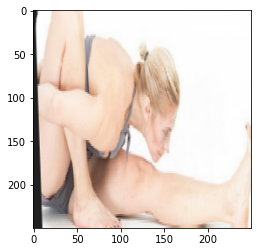

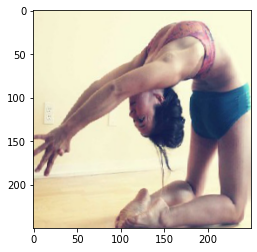

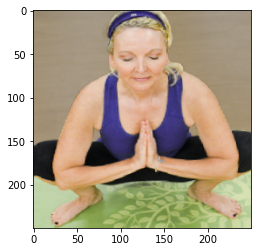

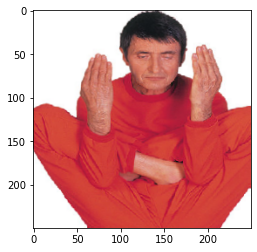

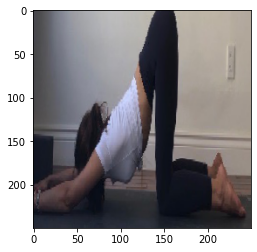

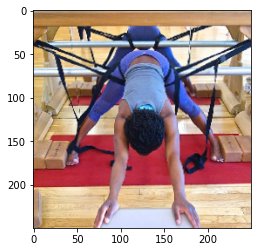

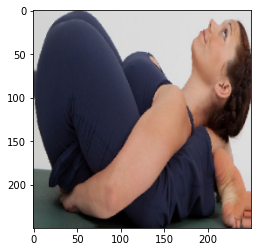

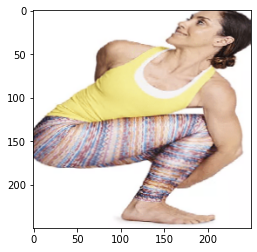

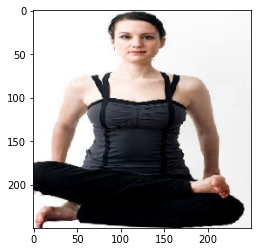

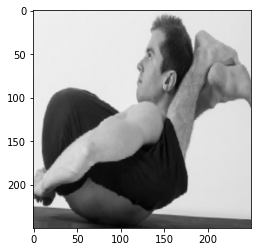

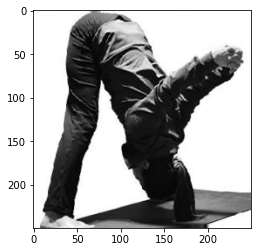

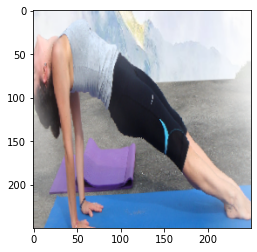

In [8]:
# x = train_set.next()
for i in range (0,15):
    image = x_batch[i]
    plt.imshow(image.transpose(0,1,2).astype(np.uint8))
    plt.show()

### Data augmentation

In [9]:
# Still in progress.

### Building the model

In [16]:
def create_model():
    

    model = Sequential()
    
    model.add(Input(shape=(250,250,3)))
    
    model.add(Conv2D(filters=15, kernel_size=(10,10), activation='relu', name="Conv2D_1"))
    model.add(Conv2D(filters=15, kernel_size=(10,10), activation='relu', name="Conv2D_2"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu', name="Conv2D_3"))
    model.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu', name="Conv2D_4"))
    model.add(MaxPool2D(pool_size=2, name="MaxPooling1D"))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(30, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(107, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [12]:
epochs = 10
batch_size = 32

In [ ]:
model = create_model()
history = model.fit(train_set, epochs = epochs, validation_data = val_set, verbose = 1)

In [ ]:
test_set = val.flow_from_directory('output/val/',
                                       target_size = (250,250),
                                       class_mode = 'categorical', seed = 2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_numbers = np.argmax(y_pred,axis = 1) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_numbers))

In [ ]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test,y_pred_numbers)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot()
plt.show()